In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
sys.path.append('benchmark/')
from gammli_test import gammli
from xgb_test import xgb
from svd_test import svd
from deepfm_fm_test import deepfm_fm
import sys
sys.path.append('../')
from gammli.GAMMLI import GAMMLI
from gammli.DataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

data= pd.read_csv('data/simulation/simulation_classification.csv')
task_type = "Classification"

meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
#the best shrinkage is 0.840000
#the best combination is 0.768746
lx_params = {
        "rank": 3,
        "main_effect_epochs":500,
        "interaction_epochs" : 500 ,
        "tuning_epochs" : 50 , 
        "mf_training_iters": 300,
        "u_group_num":50,
        "i_group_num":50,
        "best_shrinkage":0.65,
        "best_combination":0.4,
        "auto_tune":False,
        "verbose":False
    }

deepfm_fm_params = {
        "epochs":200,
        "loss_type" : 'logloss' ,
        "eval_metric" : log_loss , 
        "greater_is_better": False,
        "verbose":False,
        "early_stopping":True
    }


W0804 13:37:00.660042 25908 deprecation.py:323] From C:\Users\64161\Anaconda3\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
result_gammli = gammli('warm',data, meta_info,task_type , random_state=0, params=lx_params)
result_svd = svd('warm',data, meta_info, task_type , random_state=0)
result_deepfm, result_fm = deepfm_fm('warm',data, meta_info,task_type , random_state=0, params=deepfm_fm_params)
result_xgb = xgb('warm',data, meta_info, task_type , random_state=0)

result_sim_std = pd.concat([result_gammli,result_svd,result_xgb,result_deepfm,result_fm],0)

result_sim_std.to_csv('result/simulation_classification/simulation_classification_result.csv',index=None)

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 3
validation cold start user: 0
validation cold start item: 1


..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)
W0804 08:28:38.676823 15752 deprecation.py:506] From benchmark/deepfm\DeepFM.py:93: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6848, valid-result=0.6833 [0.3 s]
[2] train-result=0.6842, valid-result=0.6826 [0.1 s]
[3] train-result=0.6837, valid-result=0.6822 [0.1 s]
[4] train-result=0.6833, valid-result=0.6820 [0.1 s]
[5] train-result=0.6830, valid-result=0.6818 [0.1 s]
[6] train-result=0.6825, valid-result=0.6815 [0.1 s]
[7] train-result=0.6821, valid-result=0.6812 [0.1 s]
[8] train-result=0.6818, valid-result=0.6809 [0.1 s]
[9] train-result=0.6814, valid-result=0.6807 [0.1 s]
[10] train-result=0.6810, valid-res

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6832, valid-result=0.6892 [0.2 s]
[2] train-result=0.6825, valid-result=0.6892 [0.1 s]
[3] train-result=0.6821, valid-result=0.6889 [0.1 s]
[4] train-result=0.6817, valid-result=0.6886 [0.1 s]
[5] train-result=0.6815, valid-result=0.6883 [0.1 s]
[6] train-result=0.6812, valid-result=0.6879 [0.1 s]
[7] train-result=0.6810, valid-result=0.6874 [0.1 s]
[8] train-result=0.6807, valid-result=0.6870 [0.1 s]
[9] train-result=0.6803, valid-result=0.6867 [0.1 s]
[10] train-result=0.6799, valid-res

[38] train-result=0.5384, valid-result=0.6107 [0.1 s]
[39] train-result=0.5288, valid-result=0.6075 [0.1 s]
[40] train-result=0.5204, valid-result=0.6049 [0.1 s]
[41] train-result=0.5114, valid-result=0.6026 [0.1 s]
[42] train-result=0.5029, valid-result=0.6009 [0.1 s]
[43] train-result=0.4953, valid-result=0.5993 [0.1 s]
[44] train-result=0.4882, valid-result=0.5987 [0.1 s]
[45] train-result=0.4824, valid-result=0.5985 [0.1 s]
[46] train-result=0.4782, valid-result=0.5991 [0.1 s]
[47] train-result=0.4743, valid-result=0.5987 [0.1 s]
[48] train-result=0.4709, valid-result=0.5990 [0.1 s]
[49] train-result=0.4671, valid-result=0.5993 [0.1 s]


..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6907, valid-result=0.6904 [0.3 s]
[2] train-result=0.6852, valid-result=0.6843 [0.1 s]
[3] train-result=0.6827, valid-result=0.6815 [0.1 s]
[4] train-result=0.6816, valid-result=0.6804 [0.1 s]
[5] train-result=0.6809, valid-result=0.6797 [0.1 s]
[6] train-result=0.6802, valid-result=0.6792 [0.1 s]
[7] train-result=0.6796, valid-result=0.6789 [0.1 s]
[8] train-result=0.6790, valid-result=0.6785 [0.1 s]
[9] train-result=0.6784, valid-result=0.6782 [0.1 s]
[10] train-result=0.6778, valid-res

[13] train-result=0.6742, valid-result=0.6792 [0.1 s]
[14] train-result=0.6733, valid-result=0.6787 [0.1 s]
[15] train-result=0.6725, valid-result=0.6782 [0.1 s]
[16] train-result=0.6716, valid-result=0.6777 [0.1 s]
[17] train-result=0.6707, valid-result=0.6771 [0.1 s]
[18] train-result=0.6697, valid-result=0.6766 [0.1 s]
[19] train-result=0.6688, valid-result=0.6760 [0.1 s]
[20] train-result=0.6678, valid-result=0.6754 [0.1 s]
[21] train-result=0.6668, valid-result=0.6749 [0.1 s]
[22] train-result=0.6658, valid-result=0.6743 [0.1 s]
[23] train-result=0.6648, valid-result=0.6737 [0.1 s]
[24] train-result=0.6637, valid-result=0.6730 [0.1 s]
[25] train-result=0.6625, valid-result=0.6724 [0.1 s]
[26] train-result=0.6614, valid-result=0.6717 [0.1 s]
[27] train-result=0.6602, valid-result=0.6710 [0.1 s]
[28] train-result=0.6589, valid-result=0.6703 [0.1 s]
[29] train-result=0.6576, valid-result=0.6696 [0.1 s]
[30] train-result=0.6563, valid-result=0.6688 [0.1 s]
[31] train-result=0.6549, va

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6897, valid-result=0.6857 [0.3 s]
[2] train-result=0.6890, valid-result=0.6851 [0.1 s]
[3] train-result=0.6883, valid-result=0.6843 [0.1 s]
[4] train-result=0.6878, valid-result=0.6840 [0.1 s]
[5] train-result=0.6872, valid-result=0.6836 [0.1 s]
[6] train-result=0.6866, valid-result=0.6830 [0.1 s]
[7] train-result=0.6861, valid-result=0.6828 [0.1 s]
[8] train-result=0.6855, valid-result=0.6824 [0.1 s]
[9] train-result=0.6849, valid-result=0.6817 [0.1 s]
[10] train-result=0.6842, valid-res

[32] train-result=0.6246, valid-result=0.6505 [0.1 s]
[33] train-result=0.6149, valid-result=0.6452 [0.1 s]
[34] train-result=0.6038, valid-result=0.6391 [0.1 s]
[35] train-result=0.5915, valid-result=0.6324 [0.1 s]
[36] train-result=0.5776, valid-result=0.6247 [0.1 s]
[37] train-result=0.5618, valid-result=0.6168 [0.1 s]
[38] train-result=0.5462, valid-result=0.6096 [0.1 s]
[39] train-result=0.5299, valid-result=0.6022 [0.1 s]
[40] train-result=0.5143, valid-result=0.5966 [0.1 s]
[41] train-result=0.5007, valid-result=0.5940 [0.1 s]
[42] train-result=0.4904, valid-result=0.5926 [0.1 s]
[43] train-result=0.4819, valid-result=0.5914 [0.1 s]
[44] train-result=0.4767, valid-result=0.5915 [0.1 s]
[45] train-result=0.4726, valid-result=0.5915 [0.1 s]
[46] train-result=0.4685, valid-result=0.5933 [0.1 s]
[47] train-result=0.4646, valid-result=0.5940 [0.1 s]


benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6887, valid-result=0.6903 [0.3 s]
[2] train-result=0.6864, valid-result=0.6878 [0.1 s]
[3] train-result=0.6853, valid-result=0.6867 [0.1 s]
[4] train-result=0.6845, valid-result=0.6861 [0.1 s]
[5] train-result=0.6837, valid-result=0.6855 [0.1 s]
[6] train-result=0.6829, valid-result=0.6850 [0.1 s]
[7] train-result=0.6821, valid-result=0.6845 [0.1 s]
[8] train-result=0.6813, valid-result=0.6839 [0.1 s]
[9] train-result=0.6805, valid-result=0.6834 [0.1 s]
[10] train-result=0.6796, valid-res

[37] train-result=0.6415, valid-result=0.6574 [0.1 s]
[38] train-result=0.6362, valid-result=0.6546 [0.1 s]
[39] train-result=0.6297, valid-result=0.6513 [0.1 s]
[40] train-result=0.6217, valid-result=0.6472 [0.1 s]
[41] train-result=0.6116, valid-result=0.6420 [0.1 s]
[42] train-result=0.6000, valid-result=0.6362 [0.1 s]
[43] train-result=0.5866, valid-result=0.6296 [0.1 s]
[44] train-result=0.5713, valid-result=0.6225 [0.1 s]
[45] train-result=0.5549, valid-result=0.6154 [0.1 s]
[46] train-result=0.5380, valid-result=0.6088 [0.1 s]
[47] train-result=0.5219, valid-result=0.6034 [0.1 s]
[48] train-result=0.5070, valid-result=0.5992 [0.1 s]
[49] train-result=0.4937, valid-result=0.5968 [0.1 s]
[50] train-result=0.4829, valid-result=0.5957 [0.1 s]
[51] train-result=0.4739, valid-result=0.5963 [0.1 s]
[52] train-result=0.4672, valid-result=0.5967 [0.1 s]


benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6975, valid-result=0.7005 [0.3 s]
[2] train-result=0.6891, valid-result=0.6931 [0.1 s]
[3] train-result=0.6855, valid-result=0.6901 [0.1 s]
[4] train-result=0.6840, valid-result=0.6890 [0.1 s]
[5] train-result=0.6831, valid-result=0.6884 [0.1 s]
[6] train-result=0.6825, valid-result=0.6880 [0.1 s]
[7] train-result=0.6820, valid-result=0.6875 [0.1 s]
[8] train-result=0.6815, valid-result=0.6871 [0.1 s]
[9] train-result=0.6809, valid-result=0.6866 [0.1 s]
[10] train-result=0.6802, valid-res

[25] train-result=0.6676, valid-result=0.6714 [0.1 s]
[26] train-result=0.6655, valid-result=0.6701 [0.1 s]
[27] train-result=0.6631, valid-result=0.6687 [0.1 s]
[28] train-result=0.6603, valid-result=0.6670 [0.1 s]
[29] train-result=0.6569, valid-result=0.6650 [0.1 s]
[30] train-result=0.6530, valid-result=0.6627 [0.1 s]
[31] train-result=0.6483, valid-result=0.6600 [0.1 s]
[32] train-result=0.6427, valid-result=0.6568 [0.1 s]
[33] train-result=0.6362, valid-result=0.6532 [0.1 s]
[34] train-result=0.6286, valid-result=0.6491 [0.1 s]
[35] train-result=0.6195, valid-result=0.6442 [0.1 s]
[36] train-result=0.6089, valid-result=0.6388 [0.1 s]
[37] train-result=0.5965, valid-result=0.6329 [0.1 s]
[38] train-result=0.5828, valid-result=0.6268 [0.1 s]
[39] train-result=0.5672, valid-result=0.6204 [0.1 s]
[40] train-result=0.5512, valid-result=0.6149 [0.1 s]
[41] train-result=0.5356, valid-result=0.6104 [0.1 s]
[42] train-result=0.5217, valid-result=0.6076 [0.1 s]
[43] train-result=0.5086, va

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.7444, valid-result=0.7609 [0.3 s]
[2] train-result=0.7128, valid-result=0.7215 [0.1 s]
[3] train-result=0.6940, valid-result=0.6959 [0.1 s]
[4] train-result=0.6858, valid-result=0.6828 [0.1 s]
[5] train-result=0.6828, valid-result=0.6772 [0.1 s]
[6] train-result=0.6817, valid-result=0.6750 [0.1 s]
[7] train-result=0.6812, valid-result=0.6744 [0.1 s]
[8] train-result=0.6808, valid-result=0.6743 [0.1 s]
[9] train-result=0.6804, valid-result=0.6740 [0.1 s]
[10] train-result=0.6798, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6918, valid-result=0.6877 [0.3 s]
[2] train-result=0.6910, valid-result=0.6873 [0.1 s]
[3] train-result=0.6904, valid-result=0.6870 [0.1 s]
[4] train-result=0.6898, valid-result=0.6865 [0.1 s]
[5] train-result=0.6892, valid-result=0.6861 [0.1 s]
[6] train-result=0.6887, valid-result=0.6857 [0.1 s]
[7] train-result=0.6881, valid-result=0.6853 [0.1 s]
[8] train-result=0.6875, valid-result=0.6849 [0.1 s]
[9] train-result=0.6869, valid-result=0.6845 [0.1 s]
[10] train-result=0.6863, valid-res

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6907, valid-result=0.6894 [0.3 s]
[2] train-result=0.6841, valid-result=0.6808 [0.1 s]
[3] train-result=0.6816, valid-result=0.6769 [0.1 s]
[4] train-result=0.6808, valid-result=0.6753 [0.1 s]
[5] train-result=0.6806, valid-result=0.6749 [0.1 s]
[6] train-result=0.6805, valid-result=0.6748 [0.1 s]
[7] train-result=0.6804, valid-result=0.6750 [0.1 s]
[8] train-result=0.6803, valid-result=0.6751 [0.1 s]
#params: 6728
[1] train-result=0.6916, valid-result=0.6939 [0.3 s]
[2] train-result=0.68

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=0.6977, valid-result=0.6976 [0.3 s]
[2] train-result=0.6911, valid-result=0.6898 [0.1 s]
[3] train-result=0.6877, valid-result=0.6854 [0.1 s]
[4] train-result=0.6863, valid-result=0.6837 [0.1 s]
[5] train-result=0.6855, valid-result=0.6827 [0.1 s]
[6] train-result=0.6848, valid-result=0.6821 [0.1 s]
[7] train-result=0.6841, valid-result=0.6815 [0.1 s]
[8] train-result=0.6835, valid-result=0.6811 [0.1 s]
[9] train-result=0.6829, valid-result=0.6808 [0.1 s]
[10] train-result=0.6822, valid-res

[32] train-result=0.6501, valid-result=0.6649 [0.1 s]
[33] train-result=0.6451, valid-result=0.6621 [0.1 s]
[34] train-result=0.6385, valid-result=0.6585 [0.1 s]
[35] train-result=0.6299, valid-result=0.6537 [0.1 s]
[36] train-result=0.6197, valid-result=0.6480 [0.1 s]
[37] train-result=0.6070, valid-result=0.6412 [0.1 s]
[38] train-result=0.5917, valid-result=0.6336 [0.1 s]
[39] train-result=0.5745, valid-result=0.6249 [0.1 s]
[40] train-result=0.5574, valid-result=0.6185 [0.1 s]
[41] train-result=0.5416, valid-result=0.6112 [0.1 s]
[42] train-result=0.5273, valid-result=0.6064 [0.1 s]
[43] train-result=0.5150, valid-result=0.6029 [0.1 s]
[44] train-result=0.5051, valid-result=0.6008 [0.1 s]
[45] train-result=0.4965, valid-result=0.6002 [0.1 s]
[46] train-result=0.4906, valid-result=0.5992 [0.1 s]
[47] train-result=0.4867, valid-result=0.5993 [0.1 s]
[48] train-result=0.4844, valid-result=0.5993 [0.1 s]
[49] train-result=0.4817, valid-result=0.5996 [0.1 s]
[50] train-result=0.4789, va

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6916, valid-result=0.6889 [0.2 s]
[2] train-result=0.6901, valid-result=0.6875 [0.1 s]
[3] train-result=0.6887, valid-result=0.6862 [0.1 s]
[4] train-result=0.6872, valid-result=0.6849 [0.1 s]
[5] train-result=0.6856, valid-result=0.6837 [0.0 s]
[6] train-result=0.6839, valid-result=0.6823 [0.1 s]
[7] train-result=0.6819, valid-result=0.6809 [0.1 s]
[8] train-result=0.6797, valid-result=0.6793 [0.1 s]
[9] train-result=0.6768, valid-result=0.6774 [0.1 s]
[10] train-result=0.6735, valid-re

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.7146, valid-result=0.7101 [0.2 s]
[2] train-result=0.7087, valid-result=0.7056 [0.1 s]
[3] train-result=0.7036, valid-result=0.7018 [0.1 s]
[4] train-result=0.6992, valid-result=0.6988 [0.1 s]
[5] train-result=0.6954, valid-result=0.6963 [0.1 s]
[6] train-result=0.6920, valid-result=0.6942 [0.1 s]
[7] train-result=0.6888, valid-result=0.6922 [0.1 s]
[8] train-result=0.6856, valid-result=0.6902 [0.1 s]
[9] train-result=0.6821, valid-result=0.6880 [0.1 s]
[10] train-result=0.6783, valid-re

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6913, valid-result=0.6901 [0.2 s]
[2] train-result=0.6893, valid-result=0.6881 [0.1 s]
[3] train-result=0.6877, valid-result=0.6865 [0.1 s]
[4] train-result=0.6862, valid-result=0.6853 [0.1 s]
[5] train-result=0.6848, valid-result=0.6841 [0.1 s]
[6] train-result=0.6832, valid-result=0.6830 [0.1 s]
[7] train-result=0.6813, valid-result=0.6817 [0.1 s]
[8] train-result=0.6792, valid-result=0.6803 [0.1 s]
[9] train-result=0.6766, valid-result=0.6787 [0.1 s]
[10] train-result=0.6736, valid-re

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.7017, valid-result=0.6935 [0.2 s]
[2] train-result=0.6970, valid-result=0.6897 [0.1 s]
[3] train-result=0.6930, valid-result=0.6866 [0.0 s]
[4] train-result=0.6897, valid-result=0.6841 [0.1 s]
[5] train-result=0.6866, valid-result=0.6819 [0.1 s]
[6] train-result=0.6839, valid-result=0.6801 [0.1 s]
[7] train-result=0.6812, valid-result=0.6785 [0.1 s]
[8] train-result=0.6786, valid-result=0.6769 [0.1 s]
[9] train-result=0.6757, valid-result=0.6753 [0.1 s]
[10] train-result=0.6724, valid-re

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6956, valid-result=0.6933 [0.2 s]
[2] train-result=0.6938, valid-result=0.6919 [0.1 s]
[3] train-result=0.6918, valid-result=0.6903 [0.1 s]
[4] train-result=0.6895, valid-result=0.6886 [0.1 s]
[5] train-result=0.6870, valid-result=0.6868 [0.1 s]
[6] train-result=0.6842, valid-result=0.6848 [0.1 s]
[7] train-result=0.6810, valid-result=0.6826 [0.1 s]
[8] train-result=0.6775, valid-result=0.6802 [0.1 s]
[9] train-result=0.6738, valid-result=0.6777 [0.1 s]
[10] train-result=0.6698, valid-re

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.7175, valid-result=0.7143 [0.2 s]
[2] train-result=0.7109, valid-result=0.7084 [0.1 s]
[3] train-result=0.7050, valid-result=0.7031 [0.1 s]
[4] train-result=0.6997, valid-result=0.6985 [0.1 s]
[5] train-result=0.6948, valid-result=0.6943 [0.1 s]
[6] train-result=0.6902, valid-result=0.6906 [0.1 s]
[7] train-result=0.6860, valid-result=0.6873 [0.1 s]
[8] train-result=0.6820, valid-result=0.6844 [0.1 s]
[9] train-result=0.6779, valid-result=0.6816 [0.1 s]
[10] train-result=0.6737, valid-re

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6876, valid-result=0.6804 [0.2 s]
[2] train-result=0.6868, valid-result=0.6791 [0.1 s]
[3] train-result=0.6859, valid-result=0.6780 [0.1 s]
[4] train-result=0.6848, valid-result=0.6768 [0.1 s]
[5] train-result=0.6835, valid-result=0.6758 [0.1 s]
[6] train-result=0.6819, valid-result=0.6742 [0.1 s]
[7] train-result=0.6800, valid-result=0.6728 [0.1 s]
[8] train-result=0.6776, valid-result=0.6709 [0.1 s]
[9] train-result=0.6748, valid-result=0.6687 [0.1 s]
[10] train-result=0.6715, valid-re

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6952, valid-result=0.6919 [0.2 s]
[2] train-result=0.6942, valid-result=0.6911 [0.1 s]
[3] train-result=0.6931, valid-result=0.6903 [0.1 s]
[4] train-result=0.6917, valid-result=0.6894 [0.1 s]
[5] train-result=0.6900, valid-result=0.6883 [0.1 s]
[6] train-result=0.6881, valid-result=0.6871 [0.1 s]
[7] train-result=0.6857, valid-result=0.6856 [0.1 s]
[8] train-result=0.6828, valid-result=0.6839 [0.1 s]
[9] train-result=0.6794, valid-result=0.6820 [0.1 s]
[10] train-result=0.6753, valid-re

benchmark\deepfm_fm_test.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.6896, valid-result=0.6850 [0.2 s]
[2] train-result=0.6888, valid-result=0.6842 [0.1 s]
[3] train-result=0.6879, valid-result=0.6835 [0.1 s]
[4] train-result=0.6870, valid-result=0.6828 [0.1 s]
[5] train-result=0.6860, valid-result=0.6820 [0.1 s]
[6] train-result=0.6849, valid-result=0.6811 [0.1 s]
[7] train-result=0.6834, valid-result=0.6801 [0.1 s]
[8] train-result=0.6815, valid-result=0.6788 [0.1 s]
[9] train-result=0.6791, valid-result=0.6771 [0.1 s]
[10] train-result=0.6760, valid-re

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x0000021901CC62F0>, 'loss_type': 'logloss', 'epoch': 200, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function log_loss at 0x0000021900494C80>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=0.7163, valid-result=0.7193 [0.2 s]
[2] train-result=0.7088, valid-result=0.7110 [0.1 s]
[3] train-result=0.7025, valid-result=0.7041 [0.1 s]
[4] train-result=0.6974, valid-result=0.6983 [0.1 s]
[5] train-result=0.6934, valid-result=0.6937 [0.1 s]
[6] train-result=0.6900, valid-result=0.6899 [0.1 s]
[7] train-result=0.6871, valid-result=0.6868 [0.1 s]
[8] train-result=0.6846, valid-result=0.6841 [0.1 s]
[9] train-result=0.6821, valid-result=0.6817 [0.1 s]
[10] train-result=0.6795, valid-re

## explanation

In [16]:
data= pd.read_csv('data/simulation/simulation_classification.csv')
task_type = "Classification"

meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
train , test = train_test_split(data,test_size=0.2 ,random_state=0)
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info, sy, sy_t = data_initialize(train,test,meta_info,task_type ,'warm', 0, True)
model = GAMMLI(model_info=model_info, meta_info=meta_info, subnet_arch=[20, 10],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.01, auto_tune=False,
               interaction_epochs=500,main_effect_epochs=70,tuning_epochs=50,loss_threshold_main=0.01,loss_threshold_inter=0.01,combine_range=0.9,
              verbose=True, early_stop_thres=100,interact_num=10,u_group_num=50,i_group_num=50,scale_ratio=0.8,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=300,change_mode=True,convergence_threshold=0.001,max_rank=3,wc='warm',interaction_restrict='intra')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 3
validation cold start user: 0
validation cold start item: 1
ListWrapper(['uf_1', 'uf_2', 'uf_3', 'uf_4', 'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.68453, val loss: 0.68450
Main effects training epoch: 2, train loss: 0.67277, val loss: 0.67368
Main effects training epoch: 3, train loss: 0.66714, val loss: 0.67032
Main effects training epoch: 4, train loss: 0.66484, val loss: 0.66940
Main effects training epoch: 5, train loss: 0.66332, val loss: 0.66759
Main effects training epoch: 6, train loss: 0.66217, val loss: 0.66796
Main effects training epoch: 7, train loss: 0.6613

Main effects tuning epoch: 38, train loss: 0.65848, val loss: 0.66305
Main effects tuning epoch: 39, train loss: 0.65850, val loss: 0.66358
Main effects tuning epoch: 40, train loss: 0.65845, val loss: 0.66269
Main effects tuning epoch: 41, train loss: 0.65851, val loss: 0.66303
Main effects tuning epoch: 42, train loss: 0.65843, val loss: 0.66257
Main effects tuning epoch: 43, train loss: 0.65836, val loss: 0.66316
Main effects tuning epoch: 44, train loss: 0.65840, val loss: 0.66312
Main effects tuning epoch: 45, train loss: 0.65829, val loss: 0.66274
Main effects tuning epoch: 46, train loss: 0.65824, val loss: 0.66314
Main effects tuning epoch: 47, train loss: 0.65829, val loss: 0.66302
Main effects tuning epoch: 48, train loss: 0.65828, val loss: 0.66271
Main effects tuning epoch: 49, train loss: 0.65829, val loss: 0.66286
Main effects tuning epoch: 50, train loss: 0.65833, val loss: 0.66334
##########Stage 2: interaction training start.##########
Interaction training epoch: 1, tr

Interaction training epoch: 103, train loss: 0.62913, val loss: 0.64632
Interaction training epoch: 104, train loss: 0.62907, val loss: 0.64771
Interaction training epoch: 105, train loss: 0.62824, val loss: 0.64529
Interaction training epoch: 106, train loss: 0.62811, val loss: 0.64646
Interaction training epoch: 107, train loss: 0.62861, val loss: 0.64847
Interaction training epoch: 108, train loss: 0.62901, val loss: 0.64752
Interaction training epoch: 109, train loss: 0.62842, val loss: 0.64617
Interaction training epoch: 110, train loss: 0.62825, val loss: 0.64680
Interaction training epoch: 111, train loss: 0.62856, val loss: 0.64623
Interaction training epoch: 112, train loss: 0.62802, val loss: 0.64677
Interaction training epoch: 113, train loss: 0.62765, val loss: 0.64702
Interaction training epoch: 114, train loss: 0.62797, val loss: 0.64541
Interaction training epoch: 115, train loss: 0.62804, val loss: 0.64644
Interaction training epoch: 116, train loss: 0.62783, val loss: 

C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 1: observed BCE=0.421561 validation BCE=0.593414,rank=3
[SoftImpute] Iter 2: observed BCE=0.387272 validation BCE=0.583973,rank=3
[SoftImpute] Iter 3: observed BCE=0.365750 validation BCE=0.575769,rank=3
[SoftImpute] Iter 4: observed BCE=0.350546 validation BCE=0.571898,rank=3
[SoftImpute] Iter 5: observed BCE=0.340521 validation BCE=0.569148,rank=3
[SoftImpute] Iter 6: observed BCE=0.333997 validation BCE=0.567585,rank=3
[SoftImpute] Iter 7: observed BCE=0.328330 validation BCE=0.567971,rank=3
[SoftImpute] Iter 8: observed BCE=0.324670 validation BCE=0.565137,rank=3
[SoftImpute] Iter 9: observed BCE=0.319682 validation BCE=0.564499,rank=3
[SoftImpute] Iter 10: observed BCE=0.316496 validation BCE=0.564162,rank=3
[SoftImpute] Iter 11: observed BCE=0.314900 validation BCE=0.564671,rank=3
[SoftImpute] Iter 12: observed BCE=0.316022 validation BCE=0.564054,rank=3
[SoftImpute] Iter 13: observed BCE=0.317856 validation BCE=0.563511,rank=3
[SoftImpute] Iter 14: observed BCE

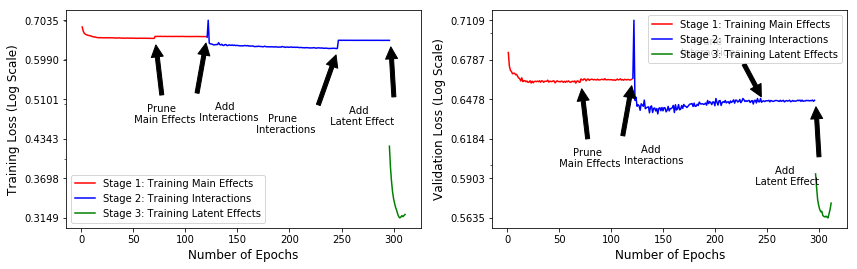

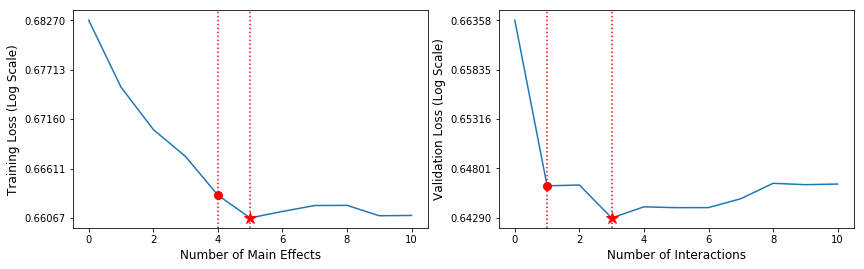

In [17]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=False)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

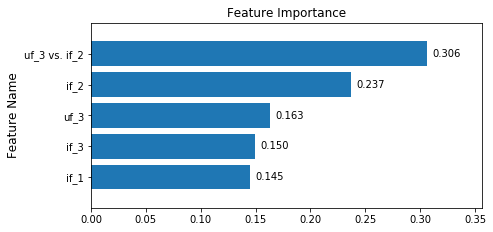

In [18]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False,)
feature_importance_visualize(data_dict, save_png=False, folder=simu_dir, name='s1_feature')

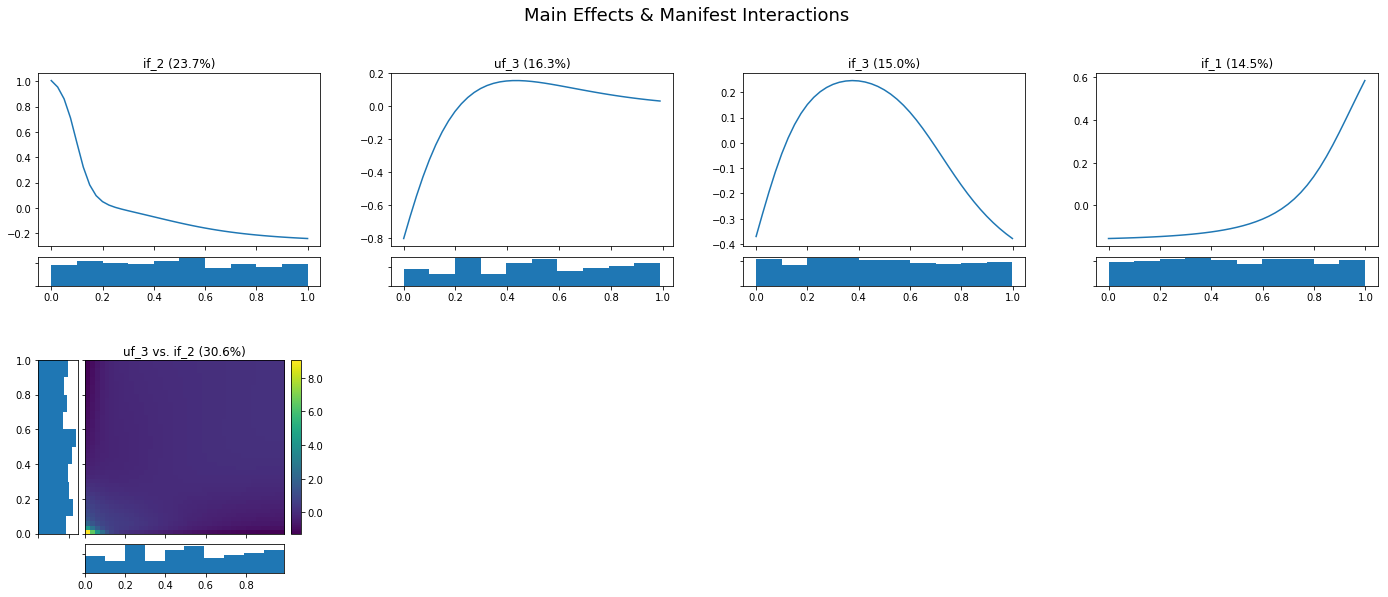

In [19]:
global_visualize_density(data_dict, save_png=False, folder=simu_dir, name='s1_global')

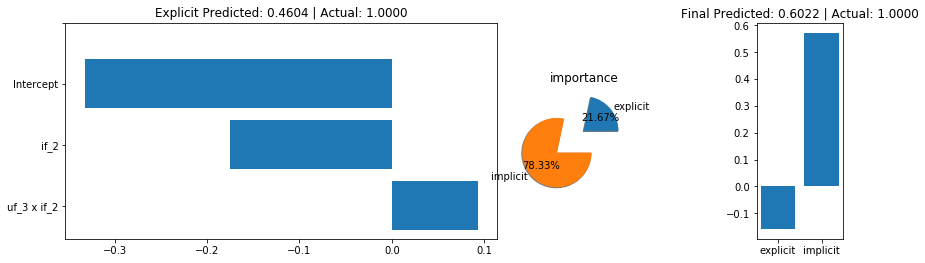

In [20]:
data_dict_local = model.local_explain(0,0,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=False, folder=simu_dir, name='s1_local',task_type='Classification')

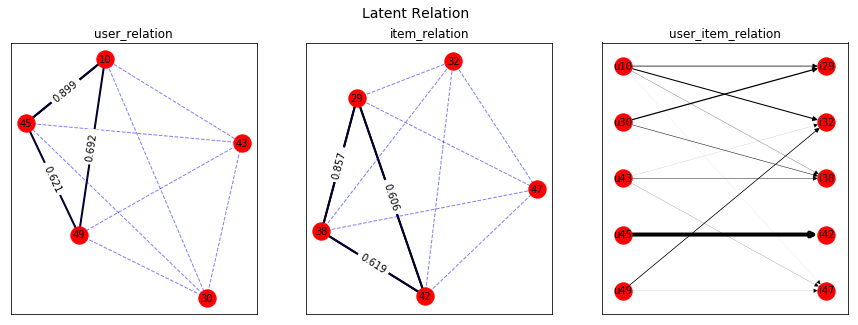

In [23]:
model.relation_plot(0.6,5,False)

In [24]:
new = te_x[91,:].reshape(1,-1)
_ = model.cold_start_analysis(new,'item',1.96)

The new item belong to group 38
 mean is [0.00372281 0.00624268 0.00391979]
 and std is [0.02902827 0.03221927 0.03476598]
 the confidence interval is [[-0.05317259 -0.05690709 -0.06422152],[0.06061821 0.06939244 0.0720611 ]]
